# Mentoria: "Detección de Objetos en Imágenes" de la Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus aplicaciones - Año: 2020.

## Grupo 2: 
 * Maria Florencia Caballero
 * Joel Vivas
 * Leonardo Rodriguez
 * Diego Gonzalez 

Mentora: Lucía Benitez.

# Desarrollo del trabajo correspondiente a la materia: "**Introducción al aprendizaje automático**".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Mentoria')


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings


#declaracion de Librerias para modelos

# helpers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.tree import plot_tree


# modelos
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

# clases de metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
data_sets_path = "/content/drive/My Drive/Mentoria/muestra"
os.chdir('{}'.format(data_sets_path))

## Armado del dataset.

In [ ]:
os.chdir('{}'.format(data_sets_path))
complete_data = pd.read_csv('csv_wlabels_muestra_df_original.csv', index_col=0)
complete_data

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Transformo la columna guantes en variable numérica.

In [ ]:
complete_data.guantes = complete_data.guantes.apply(lambda has: 1 if has == "si" else 0)

Normalizo los valores


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = complete_data.columns[13:]
num_data = complete_data[numeric_features]
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(complete_data[numeric_features]) 
complete_data.loc[:,numeric_features] = scaled_values
complete_data

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,1,Amarillo,0.263830,0.704792,0.034122,0.137222,0.092648,0.065374,0.104694,0.384243,0.202912,0.239793,0.278699,0.095227,0.152010,0.429039,0.376782,0.296330,0.005860,0.364397,0.011918,0.002358,0.048126,0.256728,0.047876,0.082648,0.174145,0.172094,0.312131,...,0.253805,0.094181,0.610268,0.289414,0.691514,0.128421,0.050855,0.073419,0.094483,0.486347,0.382585,0.165786,0.401814,0.616576,0.201839,0.229259,0.080744,0.348295,0.439004,0.213163,0.480562,0.119316,0.211313,0.013364,0.469873,0.341217,0.161916,0.372641,0.657320,0.010271,0.422114,0.286100,0.448205,0.184068,0.569234,0.180088,0.032812,0.200256,0.027650,0.274581
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,1,Amarillo,0.577466,0.138086,0.162486,0.037658,0.034621,0.032489,0.249118,0.381289,0.224014,0.165875,0.132792,0.079798,0.185580,0.138269,0.114940,0.187111,0.009517,0.079396,0.054660,0.080521,0.016673,0.193849,0.046431,0.066295,0.553121,0.425129,0.024658,...,0.447252,0.028240,0.371318,0.260486,0.497825,0.163913,0.014945,0.047418,0.169140,0.177929,0.444720,0.075417,0.091265,0.582172,0.327813,0.217719,0.423674,0.078889,0.242875,0.252735,0.062008,0.223370,0.172380,0.260777,0.149237,0.101259,0.022735,0.011264,0.240314,0.225438,0.541079,0.268994,0.224206,0.184197,0.259797,0.300957,0.029621,0.430489,0.018386,0.139015
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,1,Amarillo,0.276662,0.231597,0.135645,0.086449,0.005426,0.184723,0.291081,0.378248,0.285158,0.060636,0.255320,0.094737,0.147784,0.106009,0.191848,0.056857,0.014892,0.010346,0.122329,0.007143,0.050551,0.275225,0.095689,0.008211,0.293983,0.404770,0.070615,...,0.137048,0.025752,0.306046,0.251298,0.306387,0.209548,0.109835,0.139413,0.306591,0.257518,0.270522,0.149646,0.210179,0.316726,0.444126,0.157482,0.174262,0.039408,0.396840,0.361498,0.272636,0.181038,0.185297,0.353128,0.363755,0.003140,0.011847,0.012817,0.465840,0.041755,0.411574,0.082129,0.314391,0.052388,0.294353,0.255025,0.142438,0.322682,0.028540,0.003698
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,1,Amarillo,0.073634,0.021330,0.203134,0.063939,0.131214,0.116408,0.053503,0.670293,0.284438,0.295191,0.196855,0.064484,0.137595,0.081098,0.066263,0.304674,0.002503,0.177677,0.121388,0.042771,0.001199,0.070175,0.188737,0.020311,0.085582,0.159373,0.114208,...,0.080287,0.117168,0.011180,0.154243,0.190879,0.354282,0.080796,0.072629,0.138138,0.319386,0.505693,0.125322,0.454307,0.407196,0.162049,0.237237,0.127703,0.248148,0.097626,0.258455,0.063477,0.141511,0.033951,0.265672,0.352178,0.099349,0.001115,0.072906,0.320721,0.113174,0.446608,0.301011,0.051491,0.252406,0.371602,0.171992,0.105437,0.342362,0.004491,0.059480
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,1,Amarillo,0.243275,0.210969,0.083511,0.298701,0.100299,0.300588,0.092413,0.390186,0.417904,0.123333,0.393094,0.127781,0.102415,0.119248,0.311925,0.151580,0.019356,0.065079,0.011690,0.053481,0.091472,0.168046,0.086844,0.137874,0.421987,0.303176,0.111385,...,0.357250,0.144506,0.717966,0.237707,0.593491,0.259343,0.049501,0.130953,0.295755,0.373428,0.305955,0.030554,0.098486,0.130581,0.501315,0.343561,0.099203,0.039972,0.177219,0.351479,0.352502,0.172364,0.167722,0.239929,0.344635,0.020114,0.110975,0.125650,0.393295,0.143981,0.589046,0.138252,0.298064,0.072869,0.329794,0.073458,0.002964,0.221573,0.076812,0.156652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
train_data = complete_data[complete_data.Type == "train"]
train_data

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,1,Amarillo,0.263830,0.704792,0.034122,0.137222,0.092648,0.065374,0.104694,0.384243,0.202912,0.239793,0.278699,0.095227,0.152010,0.429039,0.376782,0.296330,0.005860,0.364397,0.011918,0.002358,0.048126,0.256728,0.047876,0.082648,0.174145,0.172094,0.312131,...,0.253805,0.094181,0.610268,0.289414,0.691514,0.128421,0.050855,0.073419,0.094483,0.486347,0.382585,0.165786,0.401814,0.616576,0.201839,0.229259,0.080744,0.348295,0.439004,0.213163,0.480562,0.119316,0.211313,0.013364,0.469873,0.341217,0.161916,0.372641,0.657320,0.010271,0.422114,0.286100,0.448205,0.184068,0.569234,0.180088,0.032812,0.200256,0.027650,0.274581
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,1,Amarillo,0.577466,0.138086,0.162486,0.037658,0.034621,0.032489,0.249118,0.381289,0.224014,0.165875,0.132792,0.079798,0.185580,0.138269,0.114940,0.187111,0.009517,0.079396,0.054660,0.080521,0.016673,0.193849,0.046431,0.066295,0.553121,0.425129,0.024658,...,0.447252,0.028240,0.371318,0.260486,0.497825,0.163913,0.014945,0.047418,0.169140,0.177929,0.444720,0.075417,0.091265,0.582172,0.327813,0.217719,0.423674,0.078889,0.242875,0.252735,0.062008,0.223370,0.172380,0.260777,0.149237,0.101259,0.022735,0.011264,0.240314,0.225438,0.541079,0.268994,0.224206,0.184197,0.259797,0.300957,0.029621,0.430489,0.018386,0.139015
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,1,Amarillo,0.276662,0.231597,0.135645,0.086449,0.005426,0.184723,0.291081,0.378248,0.285158,0.060636,0.255320,0.094737,0.147784,0.106009,0.191848,0.056857,0.014892,0.010346,0.122329,0.007143,0.050551,0.275225,0.095689,0.008211,0.293983,0.404770,0.070615,...,0.137048,0.025752,0.306046,0.251298,0.306387,0.209548,0.109835,0.139413,0.306591,0.257518,0.270522,0.149646,0.210179,0.316726,0.444126,0.157482,0.174262,0.039408,0.396840,0.361498,0.272636,0.181038,0.185297,0.353128,0.363755,0.003140,0.011847,0.012817,0.465840,0.041755,0.411574,0.082129,0.314391,0.052388,0.294353,0.255025,0.142438,0.322682,0.028540,0.003698
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,1,Amarillo,0.073634,0.021330,0.203134,0.063939,0.131214,0.116408,0.053503,0.670293,0.284438,0.295191,0.196855,0.064484,0.137595,0.081098,0.066263,0.304674,0.002503,0.177677,0.121388,0.042771,0.001199,0.070175,0.188737,0.020311,0.085582,0.159373,0.114208,...,0.080287,0.117168,0.011180,0.154243,0.190879,0.354282,0.080796,0.072629,0.138138,0.319386,0.505693,0.125322,0.454307,0.407196,0.162049,0.237237,0.127703,0.248148,0.097626,0.258455,0.063477,0.141511,0.033951,0.265672,0.352178,0.099349,0.001115,0.072906,0.320721,0.113174,0.446608,0.301011,0.051491,0.252406,0.371602,0.171992,0.105437,0.342362,0.004491,0.059480
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,1,Amarillo,0.243275,0.210969,0.083511,0.298701,0.100299,0.300588,0.092413,0.390186,0.417904,0.123333,0.393094,0.127781,0.102415,0.119248,0.311925,0.151580,0.019356,0.065079,0.011690,0.053481,0.091472,0.168046,0.086844,0.137874,0.421987,0.303176,0.111385,...,0.357250,0.144506,0.717966,0.237707,0.593491,0.259343,0.049501,0.130953,0.295755,0.373428,0.305955,0.030554,0.098486,0.130581,0.501315,0.343561,0.099203,0.039972,0.177219,0.351479,0.352502,0.172364,0.167722,0.239929,0.344635,0.020114,0.110975,0.125650,0.393295,0.143981,0.589046,0.138252,0.298064,0.072869,0.329794,0.073458,0.002964,0.221573,0.076812,0.156652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
test_data = complete_data[complete_data.Type == "test"]
test_data

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
12,M_G_Mostrando_Amarillos_132_double_box1.jpg,398,638,559,845,M,G,test,240,286,68640,1,Amarillo,0.089131,0.125952,0.135644,0.102694,0.062350,0.126561,0.055444,0.158895,0.139720,0.248224,0.089992,0.058704,0.173504,0.023893,0.116077,0.174652,0.021811,0.200798,0.105014,0.000000,0.015195,0.071587,0.287594,0.045582,0.261692,0.390127,0.082473,...,0.056744,0.295305,0.150996,0.099236,0.282814,0.338337,0.171343,0.111489,0.245949,0.693685,0.425308,0.384894,0.084456,0.204339,0.446990,0.040200,0.144485,0.016569,0.164640,0.251856,0.162343,0.088945,0.223070,0.384944,0.165409,0.145682,0.007342,0.142369,0.247505,0.539036,0.169196,0.181744,0.110329,0.049965,0.416430,0.129938,0.040065,0.133931,0.246952,0.007210
13,M_G_Mostrando_Amarillos_132_double_box2.jpg,883,1150,611,888,M,G,test,267,277,73959,1,Amarillo,0.272999,0.157616,0.102952,0.071835,0.063342,0.148045,0.081727,0.319116,0.468078,0.094473,0.110359,0.073231,0.230255,0.135488,0.191087,0.490707,0.016492,0.133836,0.010049,0.035160,0.074674,0.039869,0.165157,0.035613,0.416950,0.150653,0.151495,...,0.180441,0.118910,0.163435,0.095991,0.426181,0.181882,0.050593,0.068268,0.046674,0.388655,0.523820,0.241923,0.056468,0.663467,0.385257,0.061272,0.080845,0.245372,0.229764,0.308984,0.106131,0.149197,0.284454,0.213638,0.224470,0.454620,0.005819,0.193339,0.411507,0.036237,0.291596,0.156710,0.243297,0.038868,0.351246,0.376587,0.105106,0.192772,0.028697,0.153926
14,M_G_Mostrando_Amarillos_144_double_box1.jpg,1053,1446,180,480,M,G,test,393,300,117900,1,Amarillo,0.271879,0.139225,0.182807,0.593828,0.045274,0.082432,0.070634,0.331662,0.354751,0.294455,0.279806,0.081576,0.285408,0.130118,0.174867,0.559286,0.270379,0.416704,0.122436,0.023574,0.025133,0.254985,0.117721,0.124662,0.130459,0.095081,0.129929,...,0.192588,0.420390,0.128555,0.290832,0.206340,0.237585,0.027725,0.470981,0.136508,0.498563,0.117621,0.150811,0.299874,0.031604,0.055435,0.302098,0.231352,0.088781,0.460235,0.405190,0.029438,0.156316,0.008515,0.156763,0.219359,0.179472,0.142442,0.118645,0.161464,0.363091,0.214128,0.137974,0.140260,0.096656,0.116776,0.608599,0.235777,0.386519,0.056969,0.113281
15,M_G_Mostrando_Amarillos_144_double_box2.jpg,3,342,100,378,M,G,test,339,278,94242,1,Amarillo,0.031008,0.126082,0.261746,0.054625,0.260919,0.018259,0.128051,0.214951,0.437277,0.166989,0.066012,0.151519,0.029089,0.296356,0.087173,0.193316,0.018718,0.173380,0.006103,0.060693,0.044903,0.039367,0.056737,0.006806,0.047064,0.275838,0.061251,...,0.175263,0.483360,0.096778,0.080696,0.228726,0.459062,0.030914,0.044365,0.200389,0.185226,0.525471,0.165923,0.349277,0.231831,0.163941,0.183460,0.235571,0.205370,0.172209,0.213615,0.550856,0.078906,0.179594,0.134544,0.224323,0.003805,0.164174,0.080027,0.331366,0.047599,0.185734,0.294132,0.013742,0.256454,0.374389,0.137568,0.146857,0.081438,0.098638,0.186426
16,M_G_Mostrando_Amarillos_153_double_box1.jpg,1284,1468,342,534,M,G,test,184,192,35328,1,Amarillo,0.295415,0.189896,0.075416,0.127298,0.136183,0.141506,0.261958,0.527241,0.234040,0.460000,0.191965,0.171893,0.442676,0.138373,0.419697,0.224090,0.017907,0.138832,0.052117,0.003756,0.045668,0.019364,0.384441,0.018704,0.157713,0.188828,0.161318,...,0.066866,0.275762,0.047629,0.108806,0.128898,0.213973,0.058161,0.032550,0.193606,0.329201,0.290685,0.231224,0.102851,0.461364,0.333328,0.083530,0.129791,0.099042,0.179491,0.322141,0.081715,0.090488,0.050454,0.212281,0.327655,0.009472,0.000000,0.048352,0.184515,0.128918,0.245650,0.144833,0.104683,0.126999,0.219557,0.375369,0.007461,0.447870,0.012939,0.181973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..


## Regresion

### 1- Recordar que en nuestro caso podemos realizar clasificación podemos hacer las dos clases de clasificación, binaria ( guantes: si - no) y multiclase ('mano', 'verde' y 'amarillo'). Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.
 
Separar la base en los conjuntos *P* y *G*. 

In [ ]:
len(complete_data[complete_data.guantes == 1])/len(complete_data.guantes)*100

60.31175059952039

El 60% del dataset corresponde a con guantes y el restante 40% a imagenes sin guantes

In [ ]:
len(complete_data[complete_data.color == 'Amarillo'])/len(complete_data.color)*100

30.815347721822544

In [ ]:
len(complete_data[complete_data.color == 'mano'])/len(complete_data.color)*100

39.68824940047961

La proporcion de imagenes con guante/s amarillo, verde o sin guantes (mano) es de 30.8, 29.5 y 39.7 % respectivamente

###2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir como mucho las 5 mas representativas para:

  *   Regresión:

     a) Hacer una gráfica que muestre su relación con la variable objetivo. Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado. Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
    
     b) Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones. 

###Separando el dataset segun Size P:





En notebooks anteriores encontramos que las 5 features mas significativas son las features "164", "481", "650", "1104" y "1403".

Trabajamos sobre una copia.

In [ ]:
data_P = complete_data[complete_data.Size == 'P'].copy()


In [ ]:
train_data_P = data_P[data_P.Type == "train"]
test_data_P = data_P[data_P.Type == "test"]

In [ ]:
len(train_data_P)/len(train_data_P+test_data_P)

0.6947236180904522

Elejimos como variable objetivo para probar la regresion lineal la columna "Area", ya que no tiene sentido hacer regresion lineal con variables de clasificacion 

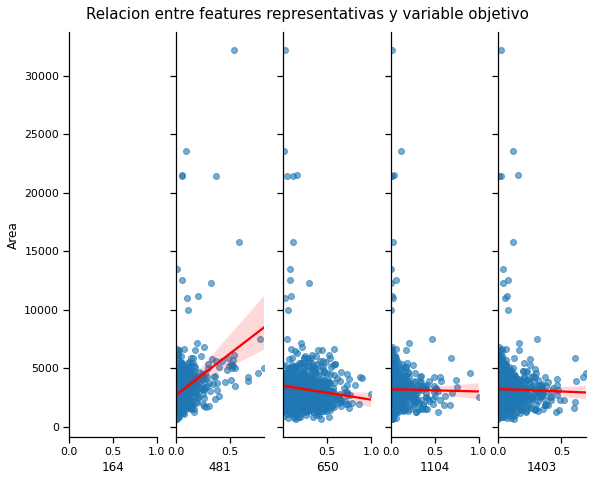

In [ ]:
sb.set_context("notebook")
g = sb.pairplot(data=data_P, x_vars=['164', '481', '650', '1104', '1403'], y_vars="Area", kind="reg",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
g.fig.set_size_inches(8,8)

#Titulo y print
plt.subplots_adjust(top=0.95)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relacion entre features representativas y variable objetivo', fontsize=15, va="center")
plt.show()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Usando la division train/test original del dataset:

Feature: 164
Train error: 3.7e+06
Test error: 7.5e+06


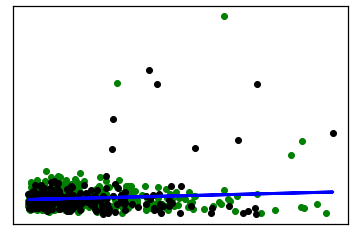

Feature: 481
Train error: 3.3e+06
Test error: 7e+06


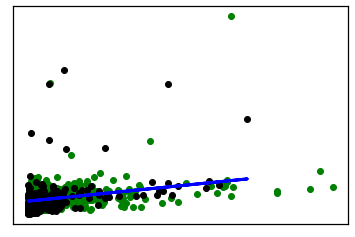

Feature: 650
Train error: 3.8e+06
Test error: 7.7e+06


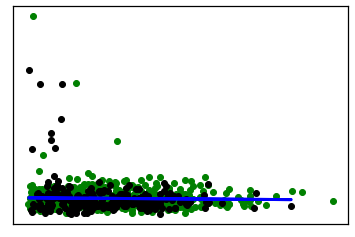

Feature: 1104
Train error: 3.8e+06
Test error: 7.8e+06


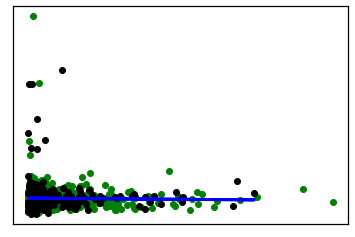

Feature: 1403
Train error: 3.8e+06
Test error: 7.8e+06


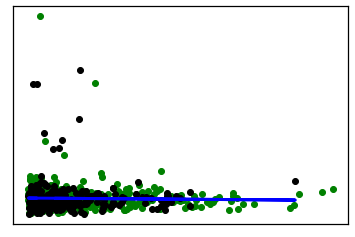

In [ ]:
features = ['164', '481', '650', '1104', '1403']
y_train = train_data_P.Area
y_test = test_data_P.Area
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
for i in features:
  X_train = train_data_P[i]
  X_test = test_data_P[i]
  X_train = X_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)
  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)
  y_train_pred = regr.predict(X_train)
  y_test_pred = regr.predict(X_test)
  train_error = mean_squared_error(y_train, y_train_pred)
  test_error = mean_squared_error(y_test, y_test_pred)
  print(f'Feature: {i}')
  print(f'Train error: {train_error:0.2}')
  print(f'Test error: {test_error:0.2}')
  plt.scatter(X_train, y_train,  color='green')
  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
  plt.xticks(())
  plt.yticks(())
  plt.show()



Utilizando scikit learn para dividir en train y test:

Feature: 164
Train error: 5.1e+06
Test error: 4.1e+06


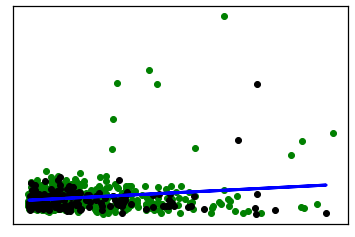

Feature: 481
Train error: 5.1e+06
Test error: 4.1e+06


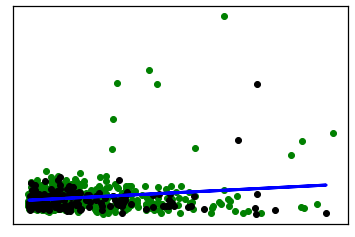

Feature: 650
Train error: 5.1e+06
Test error: 4.1e+06


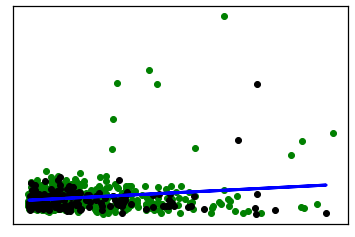

Feature: 1104
Train error: 5.1e+06
Test error: 4.1e+06


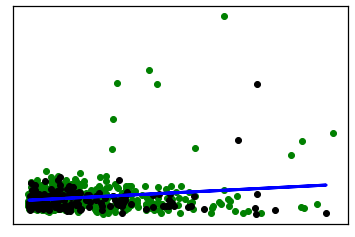

Feature: 1403
Train error: 5.1e+06
Test error: 4.1e+06


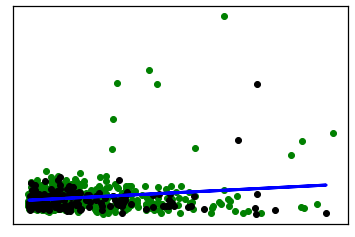

In [ ]:
from sklearn.model_selection import train_test_split
features = ['164', '481', '650', '1104', '1403']
for i in features:
  X_train, X_test, y_train, y_test = train_test_split(data_P['164'], data_P.Area, test_size=0.2, random_state = 0)
  X_train = X_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)
  y_train = y_train.values.reshape(-1,1)
  y_test = y_test.values.reshape(-1,1)
  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)
  y_train_pred = regr.predict(X_train)
  y_test_pred = regr.predict(X_test)
  train_error = mean_squared_error(y_train, y_train_pred)
  test_error = mean_squared_error(y_test, y_test_pred)
  print(f'Feature: {i}')
  print(f'Train error: {train_error:0.2}')
  print(f'Test error: {test_error:0.2}')
  plt.scatter(X_train, y_train,  color='green')
  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
  plt.xticks(())
  plt.yticks(())
  plt.show()

Como podemos observar, en todos los casos se obtienen errores muy grandes tanto para test como para train. No hay correlacion lineal entre las features y la variable objetivo.

Para la parte b del ejercicio tomaremos dos pares de variables al azar para evaluar una como variable regresora y otra como objetivo en cada par de variables y ver como se ajusta una regresion polinomial.

Tomando las features 481/650 como variable regresora y objetivo respectivamente:

Train error: 0.032
Test error: 0.027


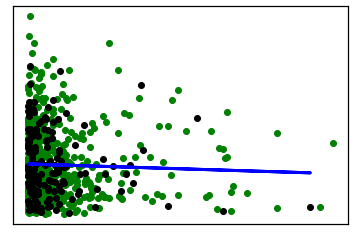

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_P['481'], data_P['650'], test_size=0.2, random_state = 0)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')
plt.scatter(X_train, y_train,  color='green')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Train Errors: [0.03156709334545722, 0.031522662442362286, 0.03149010172500776, 0.031366671347419724, 0.031225773153947034, 0.03117908336710807, 0.03117251644069471, 0.03116472027930979, 0.031100599199162932, 0.031093882995994165] 
Test Errors: [0.026828733150247985, 0.026598032220862145, 0.026637904986604, 0.026341061763646034, 0.026227872854050916, 0.026109344035749937, 0.026146653573044337, 0.02615552826346823, 0.02593491761855523, 0.02597041036867721]


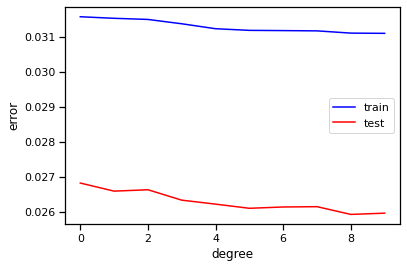

In [ ]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
print(f'Train Errors: {train_errors} \nTest Errors: {test_errors}')
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Podemos ver que no disminuye significativamente el error en test al aumentar el grado del polinomio. Para evitar sobreajuste nos quedamos con la regresion lineal

Tomando las features 164/1104 como variable regresora y objetivo respectivamente:

Train error: 0.015
Test error: 0.018


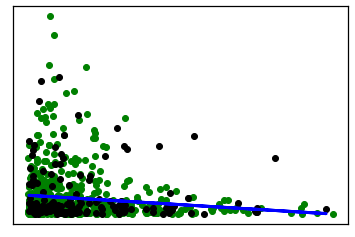

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_P['164'], data_P['1104'], test_size=0.2, random_state = 0)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')
plt.scatter(X_train, y_train,  color='green')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Train Errors: [0.01571165667915266, 0.015469955549166973, 0.015460135978720488, 0.015368133179158581, 0.015266936227975647, 0.015240345538516263, 0.015233502108315117, 0.015231163319624475, 0.01522549863291458, 0.015224591560080535] 
Test Errors: [0.017420389679362644, 0.017520690028244502, 0.01756510221025529, 0.017786130400243735, 0.017880603411693875, 0.01797302020786175, 0.017972195516521666, 0.017963290109826106, 0.01803794244757847, 0.018020626485667362]


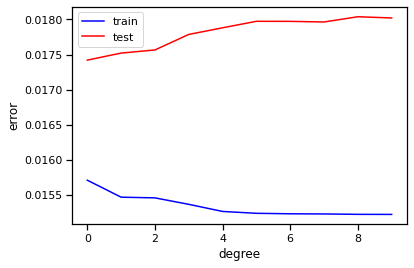

In [ ]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
print(f'Train Errors: {train_errors} \nTest Errors: {test_errors}')
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Para este par de features el error en test incluso aumenta al aumentar el grado del polinomio.

###Separando el dataset segun Size G:





En notebooks anteriores encontramos que las 5 features mas significativas son las features "164", "481", "650", "1104" y "1403".

Trabajamos sobre una copia.

In [ ]:
data_G = complete_data[complete_data.Size == 'G'].copy()


In [ ]:
train_data_G = data_G[data_G.Type == "train"]
test_data_G = data_G[data_G.Type == "test"]

In [ ]:
len(train_data_G)/len(train_data_G+test_data_G)

0.6823394495412844

Elejimos como variable objetivo para probar la regresion lineal la columna "Area", ya que no tiene sentido hacer regresion lineal con variables de clasificacion 

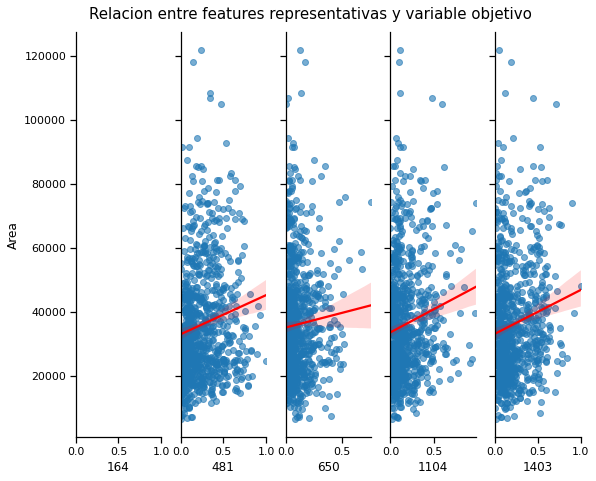

In [ ]:
sb.set_context("notebook")
g = sb.pairplot(data=data_G, x_vars=['164', '481', '650', '1104', '1403'], y_vars="Area", kind="reg",  plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.6}})
g.fig.set_size_inches(8,8)

#Titulo y print
plt.subplots_adjust(top=0.95)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relacion entre features representativas y variable objetivo', fontsize=15, va="center")
plt.show()

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Usando la division train/test original del dataset:

Feature: 164
Train error: 3.3e+08
Test error: 2.9e+08


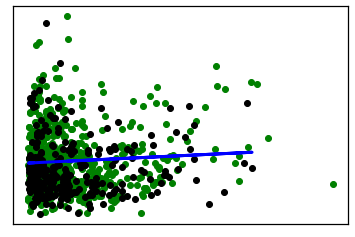

Feature: 481
Train error: 3.2e+08
Test error: 2.9e+08


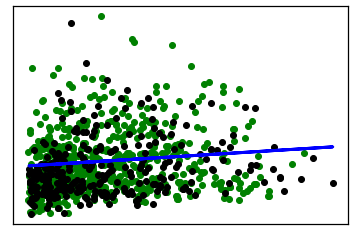

Feature: 650
Train error: 3.3e+08
Test error: 2.9e+08


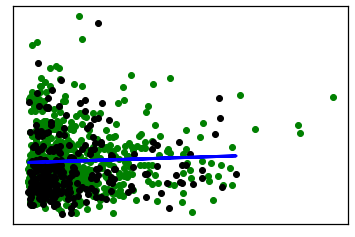

Feature: 1104
Train error: 3.2e+08
Test error: 2.9e+08


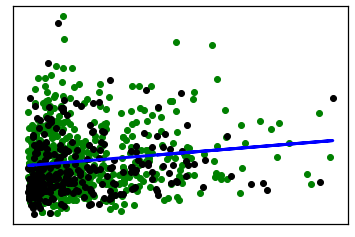

Feature: 1403
Train error: 3.2e+08
Test error: 2.9e+08


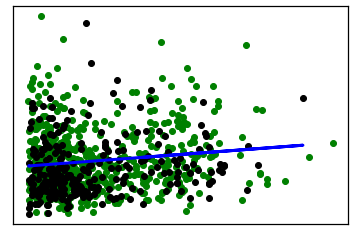

In [ ]:
features = ['164', '481', '650', '1104', '1403']
y_train = train_data_G.Area
y_test = test_data_G.Area
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
for i in features:
  X_train = train_data_G[i]
  X_test = test_data_G[i]
  X_train = X_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)
  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)
  y_train_pred = regr.predict(X_train)
  y_test_pred = regr.predict(X_test)
  train_error = mean_squared_error(y_train, y_train_pred)
  test_error = mean_squared_error(y_test, y_test_pred)
  print(f'Feature: {i}')
  print(f'Train error: {train_error:0.2}')
  print(f'Test error: {test_error:0.2}')
  plt.scatter(X_train, y_train,  color='green')
  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
  plt.xticks(())
  plt.yticks(())
  plt.show()



Utilizando scikit learn para dividir en train y test:

Feature: 164
Train error: 3.2e+08
Test error: 3.1e+08


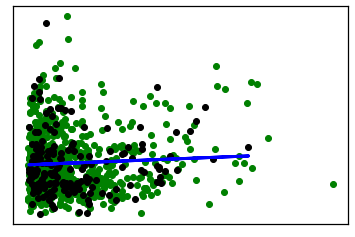

Feature: 481
Train error: 3.2e+08
Test error: 3.1e+08


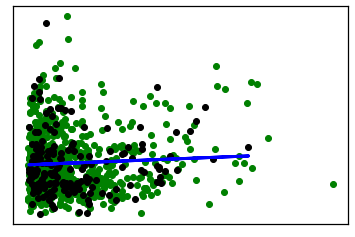

Feature: 650
Train error: 3.2e+08
Test error: 3.1e+08


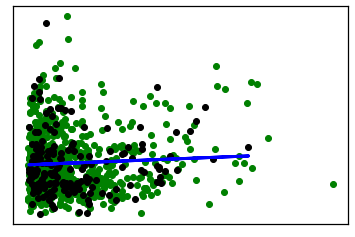

Feature: 1104
Train error: 3.2e+08
Test error: 3.1e+08


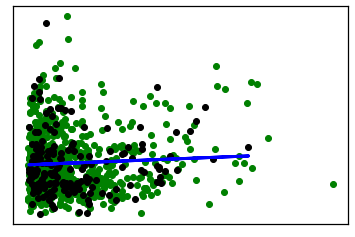

Feature: 1403
Train error: 3.2e+08
Test error: 3.1e+08


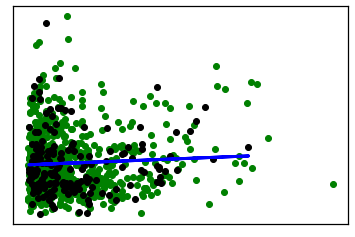

In [ ]:
from sklearn.model_selection import train_test_split
features = ['164', '481', '650', '1104', '1403']
for i in features:
  X_train, X_test, y_train, y_test = train_test_split(data_G['164'], data_G.Area, test_size=0.2, random_state = 0)
  X_train = X_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)
  y_train = y_train.values.reshape(-1,1)
  y_test = y_test.values.reshape(-1,1)
  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)
  y_train_pred = regr.predict(X_train)
  y_test_pred = regr.predict(X_test)
  train_error = mean_squared_error(y_train, y_train_pred)
  test_error = mean_squared_error(y_test, y_test_pred)
  print(f'Feature: {i}')
  print(f'Train error: {train_error:0.2}')
  print(f'Test error: {test_error:0.2}')
  plt.scatter(X_train, y_train,  color='green')
  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
  plt.xticks(())
  plt.yticks(())
  plt.show()

Como podemos observar aqui tambien, en todos los casos se obtienen errores muy grandes tanto para test como para train. No hay correlacion lineal entre las features y la variable objetivo.

Para la parte b del ejercicio tomaremos dos pares de variables al azar para evaluar una como variable regresora y otra como objetivo en cada par de variables y ver como se ajusta una regresion polinomial.

Tomando las features 481/164 como variable regresora y objetivo respectivamente:

Train error: 0.019
Test error: 0.018


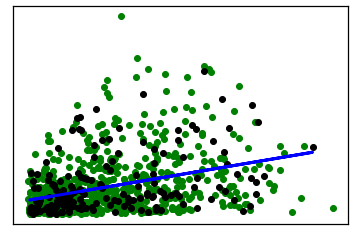

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_G['481'], data_G['164'], test_size=0.2, random_state = 0)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')
plt.scatter(X_train, y_train,  color='green')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Train Errors: [0.02169889951441326, 0.018970860843208984, 0.018596918033610813, 0.018531042987672223, 0.01852903491462687, 0.018528996025148393, 0.018511386871913813, 0.01844318382913498, 0.018360918716056007, 0.01827207346258858] 
Test Errors: [0.02100639015246537, 0.01790031835515169, 0.01793482339089304, 0.01811142424057371, 0.018092424198063978, 0.01809307186947497, 0.01798712966072618, 0.017604890068840473, 0.01737583355404937, 0.01741622516272599]


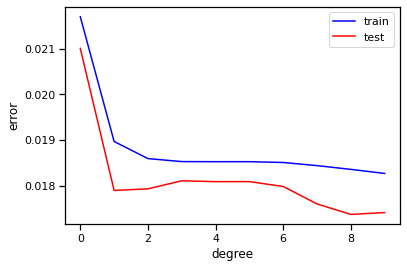

In [ ]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
print(f'Train Errors: {train_errors} \nTest Errors: {test_errors}')
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Podemos ver obtenemos el menor error para polinomio de grado 1 (regresion lineal)

Tomando las features 1403/1104 como variable regresora y objetivo respectivamente:

Train error: 0.015
Test error: 0.016


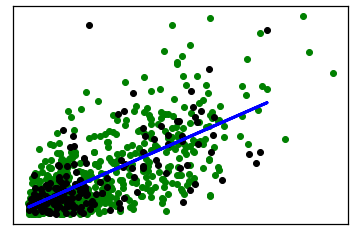

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_G['1403'], data_G['1104'], test_size=0.2, random_state = 0)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {test_error:0.2}')
plt.scatter(X_train, y_train,  color='green')
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Train Errors: [0.03059355908286351, 0.01526317997056669, 0.015144083912365543, 0.015144061555802725, 0.015140826234568552, 0.015138922874267954, 0.01496584701643366, 0.014963071129988273, 0.014956578656822577, 0.01491549629502769] 
Test Errors: [0.027677998269068353, 0.015505101581796755, 0.015659966952356587, 0.01565865637157859, 0.01561112904940787, 0.015632351040173853, 0.015482078209557574, 0.015541317858418552, 0.015553993564429063, 0.01559331951606066]


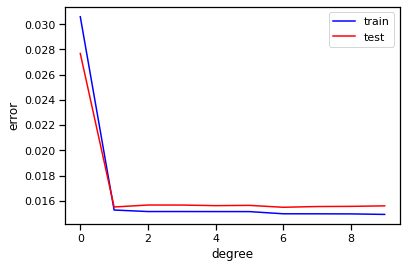

In [ ]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
print(f'Train Errors: {train_errors} \nTest Errors: {test_errors}')
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

En este caso tambien el mejor ajuste se obtiene con un polinomio de grado 1.

### Busqueda de hiperparámetros

---

Vamos a tomar la carácteristica **1403** como variable regresora y la **1104** como variable objetivo para hacer el análisis. 

In [ ]:
from sklearn.model_selection import cross_val_score# function to get cross validation scores

#X_train, X_test, y_train, y_test = train_test_split(data_G['164'], data_G.Area, test_size=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(data_G['1403'], data_G['1104'], test_size=0.2, random_state = 0)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)


def get_cv_scores(model,score, X_train=X_train, y_train=y_train):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring=score)
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')


metrics = ['r2','neg_mean_squared_error','max_error']
def get_multiples_scores(model,metrics, X_train=X_train, y_train=y_train):
  cv_means = []
  cv_std = []
  for metric in metrics:
     scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring=metric)
     cv_means.append(np.mean(scores))
     cv_std.append(np.std(scores))
  return pd.DataFrame([cv_means, cv_std],columns=metrics,index=['mean','std'])


def multiple_gridSearch(model, metrics):
  best_scores =[]
  best_params =[]
  for metric in metrics:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metric, verbose=0, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train)
    best_scores.append(grid_result.best_score_)
    best_params.append(grid_result.best_params_)
    #print('Mejor Score: ', grid_result.best_score_)
    #print('Mejor Params: ', grid_result.best_params_)
  
  resultadoDF = pd.DataFrame([best_scores, best_params],columns=metrics,index=['mejor score','mejor parámetro'])

  return resultadoDF, grid_result


Vamos a utilizar diferentos scores como medida de error: "*Error cuadrático medio, R2 y Max error*"



In [ ]:
lineal = make_pipeline(PolynomialFeatures(1), LinearRegression())
lineal.fit(X_train, y_train);


El modelo lineal entrenado anteriormente tiene un score de: 

In [ ]:
get_multiples_scores(lineal,metrics)

,r2,neg_mean_squared_error,max_error
mean,0.490388,-0.015382,-0.494069
std,0.061545,0.001637,0.066975


In [ ]:
get_cv_scores(lineal,'r2')

CV Mean:  0.4903878614480709
STD:  0.061544802238597825




### Aplicando regularización L2

Ahora vamos a aplicar alguna técnica para mejorar el resultado, en este caso vamos a utilizar "Ridge" con sus parámetros por defecto:

In [ ]:
from sklearn.linear_model import Ridge# Train model with default alpha=1

ridge = Ridge(alpha=1).fit(X_train, y_train)# get cross val scores
get_cv_scores(ridge,'r2')

CV Mean:  0.48967684420346347
STD:  0.05689224582667463




In [ ]:
get_multiples_scores(ridge,metrics)

,r2,neg_mean_squared_error,max_error
mean,0.489677,-0.015414,-0.500169
std,0.056892,0.001582,0.070097


Se puede observar que mejoran bastante los errores. 
Ahora resta encontrar cual es el mejor parámetro. Para ello vamos a utilzar GridSearchCV con varios parámetros.

In [ ]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
df, grid = multiple_gridSearch(ridge,metrics)
df

,r2,neg_mean_squared_error,max_error
mejor score,0.490427,-0.0153819,-0.494075
mejor parámetro,{'alpha': 0.1},{'alpha': 0.1},{'alpha': 0.001}


Como puede verse el mejor parámetro es alpha=0.1 

In [ ]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)# get cross val scores
get_multiples_scores(ridge,metrics)

,r2,neg_mean_squared_error,max_error
mean,0.490427,-0.015382,-0.494707
std,0.061046,0.001630,0.067294


### Aplicando regularización L1:
vamos a aplicar la regularización L1 con sus parámetros por defecto:

In [ ]:
from sklearn.linear_model import Lasso# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)# get cross val scores
get_cv_scores(lasso,'r2')

CV Mean:  -0.012883790724316224
STD:  0.008081205085816811




Si aplicamos diferentes métricas obtenemos:

In [ ]:
get_multiples_scores(lasso,metrics)

,r2,neg_mean_squared_error,max_error
mean,-0.012884,-0.030733,-0.745254
std,0.008081,0.002696,0.061304


Por lo que se puede observar que no mejora a L2. Pero podemos hacer una variacióón de parámetros para ver si hay mejoras:



In [ ]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
df, grid= multiple_gridSearch(lasso,metrics)
df

,r2,neg_mean_squared_error,max_error
mejor score,0.489765,-0.01541,-0.499479
mejor parámetro,{'alpha': 0.001},{'alpha': 0.001},{'alpha': 0.001}


Analizando se puede observar que el mejor parámetro para esta regularizacióón es con alpha=0.001

In [ ]:
lasso = Lasso(alpha=0.001).fit(X_train, y_train)# get cross val scores
get_multiples_scores(lasso,metrics)

,r2,neg_mean_squared_error,max_error
mean,0.489765,-0.015410,-0.499479
std,0.057356,0.001587,0.069792


### Aplicando regularización Elastic-Net 


In [ ]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)# get cross val scores
get_cv_scores(elastic_net,'r2')

CV Mean:  -0.012883790724316224
STD:  0.008081205085816811




In [ ]:
get_multiples_scores(elastic_net,metrics)

,r2,neg_mean_squared_error,max_error
mean,-0.012884,-0.030733,-0.745254
std,0.008081,0.002696,0.061304


Vemos que con los parámetros por defecto no mejora a los resultados anteriores. Por lo que es necesario realizar una busqueda combinada de parámetros:

In [ ]:
# find optimal alpha with grid search
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0.0001, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
df, grid = multiple_gridSearch(elastic_net,metrics)
df

,r2,neg_mean_squared_error,max_error
mejor score,0.490413,-0.0153818,-0.494425
mejor parámetro,"{'alpha': 0.0001, 'l1_ratio': 0.0001}","{'alpha': 0.0001, 'l1_ratio': 0.0001}","{'alpha': 0.0001, 'l1_ratio': 0.0001}"


Donde se puede ver que con los parámetros de alpha=0.0001 y un L1 = 0.0001 se obtiene el mejor resultado. 

In [ ]:
elastic_net = ElasticNet(alpha=0.0001, l1_ratio=0.0001).fit(X_train, y_train)# get cross val scores
get_multiples_scores(elastic_net,metrics)

,r2,neg_mean_squared_error,max_error
mean,0.490413,-0.015382,-0.494425
std,0.061266,0.001633,0.067153


### Aplicación de los mejores módelos obtenidos al conjuto de test:

Modelo Lineal:

In [ ]:
get_multiples_scores(lineal,metrics,X_test, y_test)

,r2,neg_mean_squared_error,max_error
mean,0.423163,-0.015877,-0.399978
std,0.086565,0.008291,0.192181


Modelo Ridge:

In [ ]:
grid.score(X_test,y_test)
get_multiples_scores(ridge,metrics,X_test, y_test)

,r2,neg_mean_squared_error,max_error
mean,0.425142,-0.015862,-0.399874
std,0.082988,0.008375,0.192293


Modelo Lasso:

In [ ]:
grid.score(X_test,y_test)
get_multiples_scores(lasso,metrics,X_test, y_test)

,r2,neg_mean_squared_error,max_error
mean,0.426316,-0.015882,-0.400016
std,0.078718,0.008509,0.192381


Modelo Elistic-Net:

In [ ]:
get_multiples_scores(elastic_net,metrics,X_test, y_test)

,r2,neg_mean_squared_error,max_error
mean,0.423474,-0.015874,-0.399963
std,0.086030,0.008303,0.192195


## Clasificación

### Perceptrón


In [ ]:
test_data_perceptron = test_data.copy()

In [ ]:
train_data_perceptron = train_data.copy()

Entrenaremos un modelo Perceptron para clasificar según la columna 'guantes'.

In [ ]:
def project_data_perceptron(features):
    X_train = train_data_perceptron[features]
    Y_train = train_data_perceptron["guantes"]
    X_test  = test_data_perceptron[features] 
    Y_test  = test_data_perceptron["guantes"]
    return (X_train, Y_train, X_test, Y_test)

In [ ]:
def default_perceptron(X_train, Y_train, X_test, Y_test):
    clf = Perceptron(random_state=0)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print(classification_report(Y_test, Y_test_pred))
    return clf

Se obtiene un modelo con muy buenos scores:

In [ ]:
(X_train, Y_train, X_test, Y_test) = project_data_perceptron(numeric_features)
default_perceptron(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       208
           1       0.92      0.96      0.94       312

    accuracy                           0.93       520
   macro avg       0.93      0.92      0.92       520
weighted avg       0.93      0.93      0.93       520



Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Buscando mejores parámetros, obtenemos el mismo modelo que con los parámetros
por defecto.

In [ ]:
param_grid_perceptron = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "tol": [1e-3, 1e-5, 1e-7]
}

In [ ]:
def best_perceptron(X_train, Y_train, X_test, Y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
    model = Perceptron(random_state=0)
    model_gscv = GridSearchCV(model,param_grid_perceptron,cv=skf)
    model_gscv.fit(X_train, Y_train)
    best_model = model_gscv.best_estimator_
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print(classification_report(Y_test, Y_test_pred))
    return best_model

In [ ]:
best_perceptron(X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       208
           1       0.92      0.96      0.94       312

    accuracy                           0.93       520
   macro avg       0.93      0.92      0.92       520
weighted avg       0.93      0.93      0.93       520



Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

### SGD

In [ ]:
test_data_sgd = test_data.copy()

In [ ]:
train_data_sgd = train_data.copy()

Intentamos ahora con un modelo Stochastic Gradient Descent, obteniendo
resultados similares que con el perceptrón.

In [ ]:
def project_data_sgd(features):
    X_train = train_data_sgd[features]
    Y_train = train_data_sgd["guantes"]
    X_test  = test_data_sgd[features] 
    Y_test  = test_data_sgd["guantes"]
    return (X_train, Y_train, X_test, Y_test)

In [ ]:
def default_sgd(X_train, Y_train, X_test, Y_test):
    clf = SGDClassifier(random_state=0)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print(classification_report(Y_test, Y_test_pred))
    return clf

In [ ]:
(X_train, Y_train, X_test, Y_test) = project_data_sgd(numeric_features)
default_sgd(X_train, Y_train, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       208
           1       0.92      0.94      0.93       312

    accuracy                           0.91       520
   macro avg       0.91      0.90      0.91       520
weighted avg       0.91      0.91      0.91       520



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

La busqueda por parámetors nos provee un modelo ligeramente mejor en accuracy. Evitamos poner "perceptron" como opción en el parámetro "loss" para evitar 
calcular nuevamente un perceptrón.

In [ ]:
param_grid_sgd = {
    "loss": ["hinge", "log", "modified_huber", "squared_hinge"],
    "tol": [1e-3, 1e-5, 1e-7]
}

In [ ]:
def best_sgd(X_train, Y_train, X_test, Y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
    model = SGDClassifier(random_state=0)
    model_gscv = GridSearchCV(model,param_grid_sgd,cv=skf)
    model_gscv.fit(X_train, Y_train)
    best_model = model_gscv.best_estimator_
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print(classification_report(Y_test, Y_test_pred))
    return best_model

In [ ]:
best_sgd(X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

           0       0.91      0.88      0.89       208
           1       0.92      0.94      0.93       312

    accuracy                           0.92       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.92      0.92      0.92       520



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=0, shuffle=True, tol=1e-05, validation_fraction=0.1,
              verbose=0, warm_start=False)

El modelo obtenido tiene una tolerancia de "1e-5", que se diferencia del valor "1e-3" que tiene en el modelo por defecto.

### Árboles de decisión

A continuación crearemos un árbol de decisión teniendo a la columna 'guantes' como target.

In [ ]:
test_data_tree = test_data.copy()

In [ ]:
train_data_tree = train_data.copy()
train_data_tree

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,1,Amarillo,0.263830,0.704792,0.034122,0.137222,0.092648,0.065374,0.104694,0.384243,0.202912,0.239793,0.278699,0.095227,0.152010,0.429039,0.376782,0.296330,0.005860,0.364397,0.011918,0.002358,0.048126,0.256728,0.047876,0.082648,0.174145,0.172094,0.312131,...,0.253805,0.094181,0.610268,0.289414,0.691514,0.128421,0.050855,0.073419,0.094483,0.486347,0.382585,0.165786,0.401814,0.616576,0.201839,0.229259,0.080744,0.348295,0.439004,0.213163,0.480562,0.119316,0.211313,0.013364,0.469873,0.341217,0.161916,0.372641,0.657320,0.010271,0.422114,0.286100,0.448205,0.184068,0.569234,0.180088,0.032812,0.200256,0.027650,0.274581
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,1,Amarillo,0.577466,0.138086,0.162486,0.037658,0.034621,0.032489,0.249118,0.381289,0.224014,0.165875,0.132792,0.079798,0.185580,0.138269,0.114940,0.187111,0.009517,0.079396,0.054660,0.080521,0.016673,0.193849,0.046431,0.066295,0.553121,0.425129,0.024658,...,0.447252,0.028240,0.371318,0.260486,0.497825,0.163913,0.014945,0.047418,0.169140,0.177929,0.444720,0.075417,0.091265,0.582172,0.327813,0.217719,0.423674,0.078889,0.242875,0.252735,0.062008,0.223370,0.172380,0.260777,0.149237,0.101259,0.022735,0.011264,0.240314,0.225438,0.541079,0.268994,0.224206,0.184197,0.259797,0.300957,0.029621,0.430489,0.018386,0.139015
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,1,Amarillo,0.276662,0.231597,0.135645,0.086449,0.005426,0.184723,0.291081,0.378248,0.285158,0.060636,0.255320,0.094737,0.147784,0.106009,0.191848,0.056857,0.014892,0.010346,0.122329,0.007143,0.050551,0.275225,0.095689,0.008211,0.293983,0.404770,0.070615,...,0.137048,0.025752,0.306046,0.251298,0.306387,0.209548,0.109835,0.139413,0.306591,0.257518,0.270522,0.149646,0.210179,0.316726,0.444126,0.157482,0.174262,0.039408,0.396840,0.361498,0.272636,0.181038,0.185297,0.353128,0.363755,0.003140,0.011847,0.012817,0.465840,0.041755,0.411574,0.082129,0.314391,0.052388,0.294353,0.255025,0.142438,0.322682,0.028540,0.003698
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,1,Amarillo,0.073634,0.021330,0.203134,0.063939,0.131214,0.116408,0.053503,0.670293,0.284438,0.295191,0.196855,0.064484,0.137595,0.081098,0.066263,0.304674,0.002503,0.177677,0.121388,0.042771,0.001199,0.070175,0.188737,0.020311,0.085582,0.159373,0.114208,...,0.080287,0.117168,0.011180,0.154243,0.190879,0.354282,0.080796,0.072629,0.138138,0.319386,0.505693,0.125322,0.454307,0.407196,0.162049,0.237237,0.127703,0.248148,0.097626,0.258455,0.063477,0.141511,0.033951,0.265672,0.352178,0.099349,0.001115,0.072906,0.320721,0.113174,0.446608,0.301011,0.051491,0.252406,0.371602,0.171992,0.105437,0.342362,0.004491,0.059480
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,1,Amarillo,0.243275,0.210969,0.083511,0.298701,0.100299,0.300588,0.092413,0.390186,0.417904,0.123333,0.393094,0.127781,0.102415,0.119248,0.311925,0.151580,0.019356,0.065079,0.011690,0.053481,0.091472,0.168046,0.086844,0.137874,0.421987,0.303176,0.111385,...,0.357250,0.144506,0.717966,0.237707,0.593491,0.259343,0.049501,0.130953,0.295755,0.373428,0.305955,0.030554,0.098486,0.130581,0.501315,0.343561,0.099203,0.039972,0.177219,0.351479,0.352502,0.172364,0.167722,0.239929,0.344635,0.020114,0.110975,0.125650,0.393295,0.143981,0.589046,0.138252,0.298064,0.072869,0.329794,0.073458,0.002964,0.221573,0.076812,0.156652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
def project_data(features):
    X_train = train_data_tree[features]
    Y_train = train_data_tree["guantes"]
    X_test  = test_data_tree[features] 
    Y_test  = test_data_tree["guantes"]
    return (X_train, Y_train, X_test, Y_test)

In [ ]:
def tree_default(X_train, Y_train, X_test, Y_test):
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print(classification_report(Y_test, Y_test_pred))
    plt.figure(figsize=(15,6))
    plot_tree(clf);

Obtenemos el siguiente árbol de decisión con parámetros por defecto:

              precision    recall  f1-score   support

           0       0.69      0.76      0.73       208
           1       0.83      0.78      0.80       312

    accuracy                           0.77       520
   macro avg       0.76      0.77      0.77       520
weighted avg       0.78      0.77      0.77       520



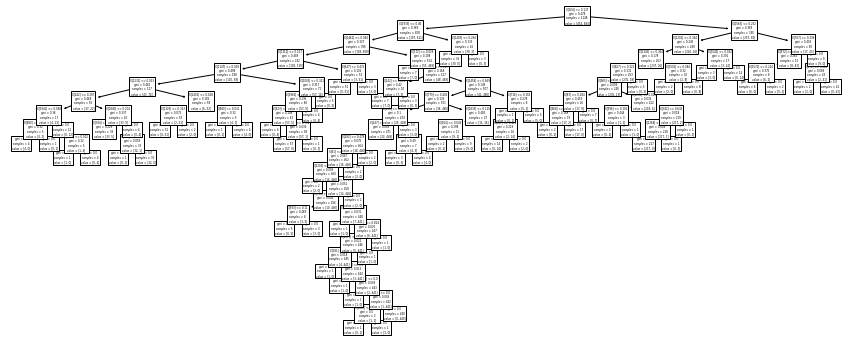

In [ ]:
(X_train, Y_train, X_test, Y_test) = project_data(numeric_features)
tree_default(X_train, Y_train, X_test, Y_test)

Buscaremos ahora un árbol de decisión usando cross-validation.

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', ],
    'splitter': ['best', 'random',],
    'max_depth': [None,1,3,5,7,9,11,13,15, 17],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
}

# Takes a few minutes!
def best_tree(X_train, Y_train, X_test, Y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
    model = DecisionTreeClassifier(random_state=0)
    model_gscv = GridSearchCV(model,param_grid,cv=skf)
    model_gscv.fit(X_train, Y_train)
    best_model = model_gscv.best_estimator_
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print(classification_report(Y_test, Y_test_pred))
    plt.figure(figsize=(30,12))
    plot_tree(best_model)
    return best_model

In [ ]:
dec_tree = None

Se obtiene un modelo más simple en profundidad pero con muy buena *accuracy*. Muchas de las features que aparecen coinciden con las que habíamos elegido con las mejores en la notebook anterior, en particular la raíz del árbol es la feature con mejor puntaje.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


              precision    recall  f1-score   support

           0       0.86      0.55      0.67       208
           1       0.76      0.94      0.84       312

    accuracy                           0.78       520
   macro avg       0.81      0.75      0.76       520
weighted avg       0.80      0.78      0.77       520



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

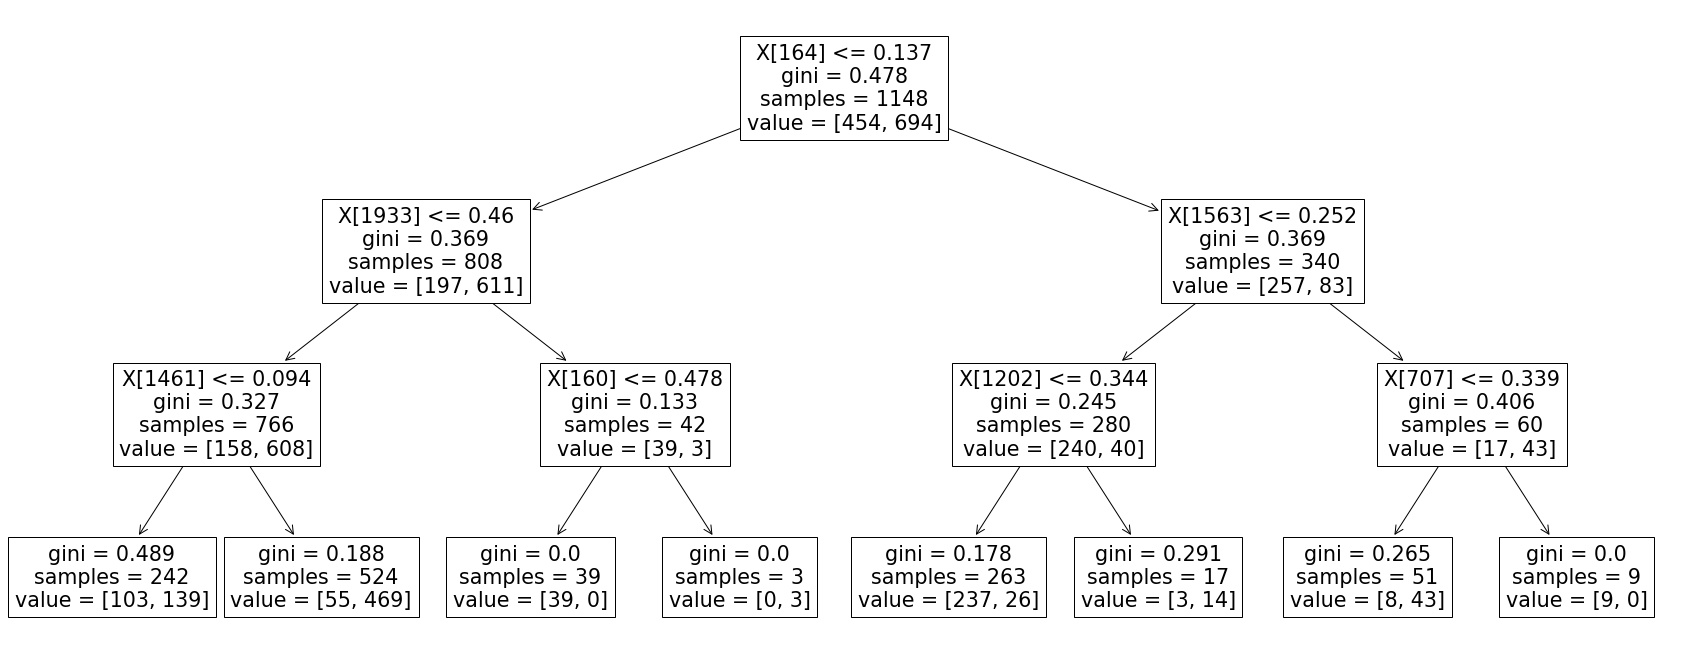

In [ ]:
                                                if dec_tree is None:
  (X_train, Y_train, X_test, Y_test) = project_data(numeric_features)
  dec_tree = best_tree(X_train, Y_train, X_test, Y_test)
dec_tree

Sin embargo si intentamos restringir el árbol a sólo las features que habíamos seleccionado antes, se obtiene  un árbol con menor *accuracy*, por eso decidimos no restringirlo.